# 2D Sequence Regression Example

The following code demonstrates how to use the seqreg module on 2D data. This example for predicting pool boiling heat flux from AE sensor hit data (named Hit2Flux).

## Setup Collab:

In [1]:
!pip install seqreg
!pip install scikit-learn==1.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 26.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.


In [2]:
import gdown

## Let's start:

In [3]:
# Load Module
import seqreg.seqreg as seqreg

### Test Data on Pretrained Model

In [6]:
# Download Testing Data
gdown.download('https://osf.io/xvdmk/download', 'Hit2FluxTest.zip', quiet=False)

!unzip ./Hit2FluxTest.zip -d /content/ &> /dev/null

Downloading...
From: https://osf.io/xvdmk/download
To: /content/Hit2FluxTest.zip
100%|██████████| 15.6M/15.6M [00:02<00:00, 7.16MB/s]


In [8]:
# Load Data
testfolder='./2D-Hit2Flux_TestData/'      # Define path to test folder

'''
LoadDataFromFolder Function
---------------------------
Inputs:
    * folderpath
    * xname
    * yname
    * tname
    * datatype: either "Value" or "txtFilePath" depending on data in x column of csv files
Outputs:
    * xds
    * yds
    * timeds
'''
xtestds,ytestds,timetestds=seqreg.LoadDataFromFolder(testfolder,"AE Sound Paths","Heat Flux",datatype="txtFilePath")

In [12]:
# Prepare Data
seqlen,stride,dt=25,2,0.01     # Define parameters

'''
PrepareData Function
----------------------
Inputs:
    * x
    * y
    * time
    * seqlen
    * stride
    * dt: Timestep for use in fft function
    * fft: (Boolean)
    * seqout: (Boolean) for if the y data should be a sequence
Outputs:
    * x1: numpy array
    * y1
    * t1
'''
xtest,ytest,timetest=seqreg.PrepareData(xtestds,ytestds,timetestds,seqlen,stride,dt,fft=True,seqout=True)

In [9]:
# Download HydReg Model (You can directly download it directly from GitHub)
gdown.download('https://osf.io/2hqym/download' , './Hit2Flux_weights.h5' , quiet=False)

Downloading...
From: https://osf.io/2hqym/download
To: /content/Hit2Flux_weights.h5
100%|██████████| 278M/278M [00:18<00:00, 14.6MB/s]


'./Hit2Flux_weights.h5'

In [10]:
# Load Model
architecturename='Hit2Flux'     # Name of model architecture
savedmodelpath="./Hit2Flux_weights.h5"    # Path to pretrained saved weights or model

'''
Model Function
-----------------
Inputs:
    * modelname
    * savemodelpath
    * train: Boolean
    * xtrain:
    * ytrain
Outputs:
    * model
'''
model=seqreg.Model('Hit2Flux',savedmodelpath,train=False)     # Load model

20/20 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step


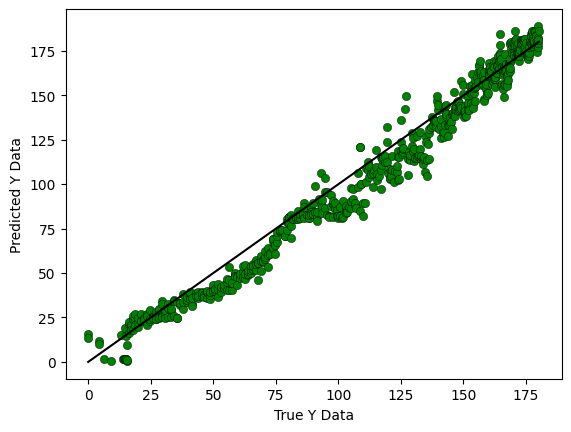

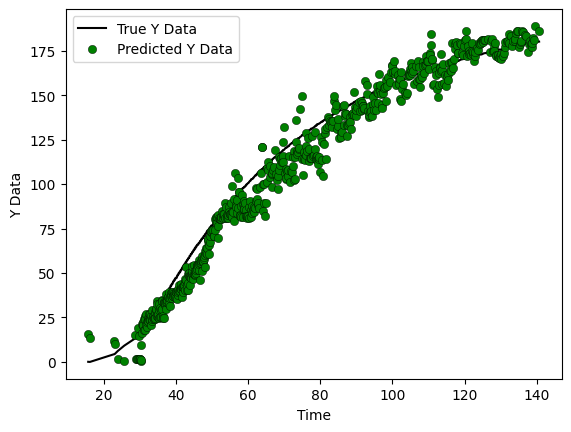

{'r2': 0.9668520406108103, 'mse': 88.99120173983603, 'mape': 89.65178275676429}

<Figure size 640x480 with 0 Axes>

In [14]:
# Analyze
'''
Analyze Function
------------------
Inputs:
    * model
    * savepath
    * xtest
    * ytest
    * time
    * xname
    * yname
    * seqout: Boolean
    * showplot: Boolean
Outputs:
    * results: dictionary containing performance metrics
'''
seqreg.Analyze(model,"./Outputs",xtest,ytest,timetest,seqout=True)

### Train on Your Own Data

In [ ]:
'''
# Only testing data is provided for this tutorial. For training on your own data the following code could be used:

# Load and Prepare Training Data
trainfolder='./TrainData'     # Folder containing training data
xtrainds,ytrainds,timetrainds=seqreg.LoadDataFromFolder(trainfolder,"AE Sound Paths","Heat Flux")   # Load training data

seqlen,stride,dt=25,2,0.01      # Define parameters
xtrain,ytrain,timetrain=seqreg.PrepareData(xtrainds,ytrainds,timetrainds,seqlen,stride,dt,fft=True, seqout=True)    # Prepare data


# Define model for training
architecturename='Hit2Flux'     # Name of model architecture
savemodelpath="./Hit2Flux_custom.joblib"    # Specify path to save weights/ model

model=seqreg.Model('Hit2Flux',savemodelpath,train=True, xtrain=xtrain,ytrain=ytrain)

# Analyze
seqreg.Analyze(model,"./",xtest,ytest,timetest,seqout=True)    # Test model performance on testing data
'''